In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [97]:
def bench(n=2**20, q=2**20, source='std'):
    !make -s {source}
    if _exit_code != 0:
        raise Exception("Compilation failed")
    res = !./{source} {n} {q}
    #res = !g++ -O3 -march=native -D N={n} -D Q={q} {source} -o run && ./run
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

ns = list(int(1.17**k) for k in range(30, 60))

In [98]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [99]:
# bench(source='textbook', n=2**24)
# bench(source='branchless', n=2**24)
# bench(source='branchless-prefetch', n=2**24)
# bench(source='branchless-drop-in', n=2**24)

In [100]:
# bench(source='branchless-drop-in', n=2**12)

In [101]:
# [bench(source=source, n=2**12) for source in ['textbook', 'branchless', 'branchless-drop-in']]

In [102]:
# x = [bench(source='eytzinger', n=n, q=2**22) for n in ns]

In [103]:
# y = [bench(source='eytzinger-last', n=n, q=2**22) for n in ns]

In [104]:
# z = [bench(source='eytzinger-fill', n=n, q=2**22) for n in ns]

In [105]:
# mini_std = [bench(source='std', n=n, q=2**22) for n in ns]
# mini_branchless = [bench(source='branchless', n=n, q=2**22) for n in ns]

In [106]:
# plt.plot(ns, mini_std, color='darkred', label='std::lower_bound')
# plt.plot(ns, mini_branchless, color='darkblue', label='branchless')
# plt.plot(ns, x, color='darkgreen', label='eytzinger')

# plot('Binary search', 'Latency (ns)', path='bumps.svg', legend=True)

In [107]:
# plt.plot(ns, x, color='darkred', label='GCC')
# plt.plot(ns, z, color='darkblue', label='GCC (padded array)')
# plt.plot(ns, y, color='darkgreen', label='Clang (removed branch)')

# plot('Binary search', 'Latency (ns)', path='branchless-eytzinger.svg', legend=True)

In [108]:
# bench(source='btree', n=2**23, q=2**22)
# bench(source='btree-hugepages', n=2**23, q=2**22)

In [109]:
#bench(n=2**10, q=2**22, source='std')
#bench(n=2**10, q=2**22, source='textbook')
# bench(n=2**10, q=2**22, source='branchless')
# bench(n=2**10, q=2**22, source='btree-hugepages')
# bench(n=2**10, q=2**22, source='btree-unrolled')

In [110]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [111]:
tasks = [
    # source, name, color
    ('std', 'standard', 'darkred'),
    ('branchless', 'branchless', 'darkblue'),
    ('branchless-prefetch', 'branchless + prefetching', 'darkgreen'),
    ('eytzinger', 'eytzinger', 'purple'),
    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),
    ('eytzinger-fill','eytzinger (fixed number of iterations)', 'purple')
    # ('btree', 'B-tree (with SIMD)', 'purple'),
    # ('btree-hugepages', 'B-tree (with SIMD and huge pages)', 'cyan'),
]

#ns = [2**14, 2**15]
ns = list(int(1.17**k) for k in range(30, 105))

results = [
    [bench(n=n, q=2**22, source=source) for n in ns]
    for source, _, _ in tasks
]

               std 111     4194304          0 58.15
               std 129     4194304          0 44.98
               std 152     4194304          0 41.78
               std 177     4194304          0 44.79
               std 208     4194304          0 47.91
               std 243     4194304       -234 47.26
               std 284     4194304       -274 44.51
               std 333     4194304       -323 49.46
               std 389     4194304       -377 48.25
               std 456     4194304       -444 45.44
               std 533     4194304       -520 54.75
               std 624     4194304       -610 56.07
               std 730     4194304       -715 55.34
               std 855     4194304        949 52.85
               std 1000    4194304        712 55.39
               std 1170    4194304       1322 54.4
               std 1369    4194304       1235 56.52
               std 1602    4194304       2039 57.27
               std 1874    4194304       1283 54.58
             

In [112]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

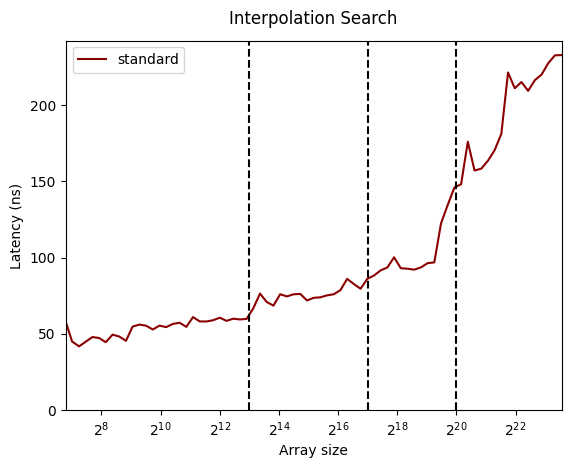

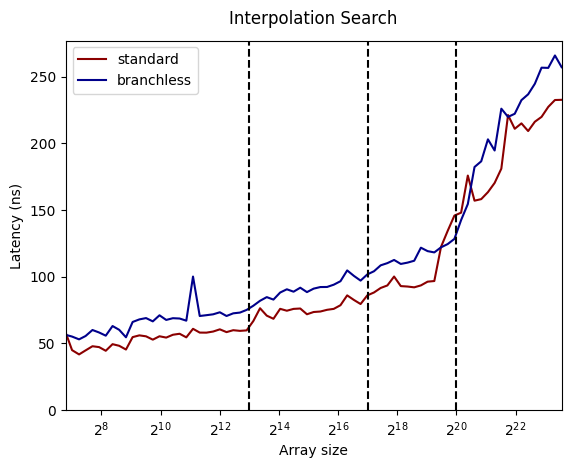

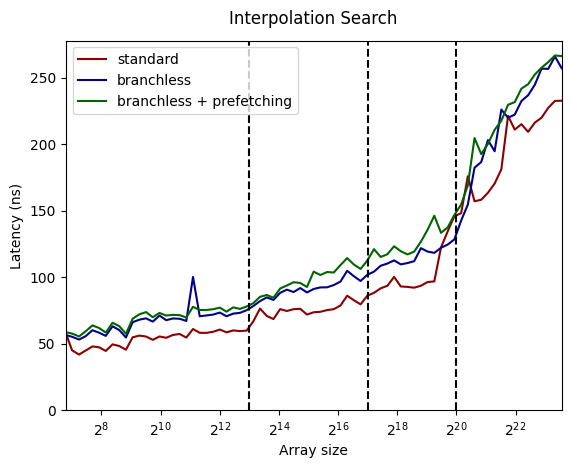

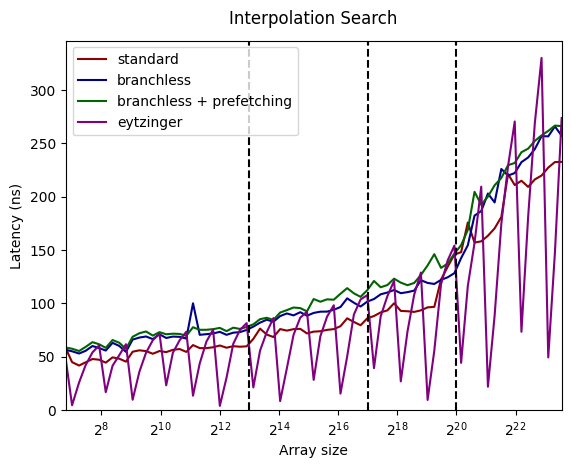

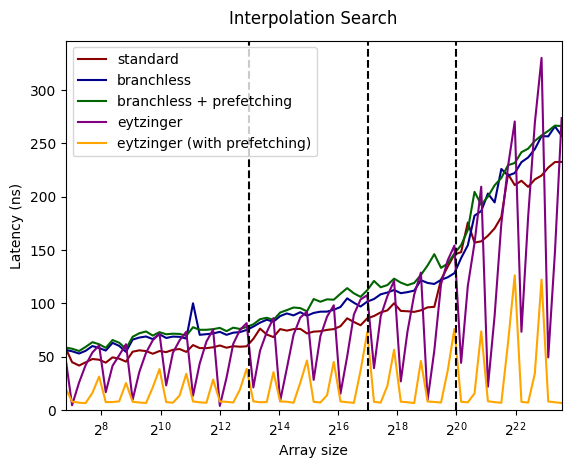

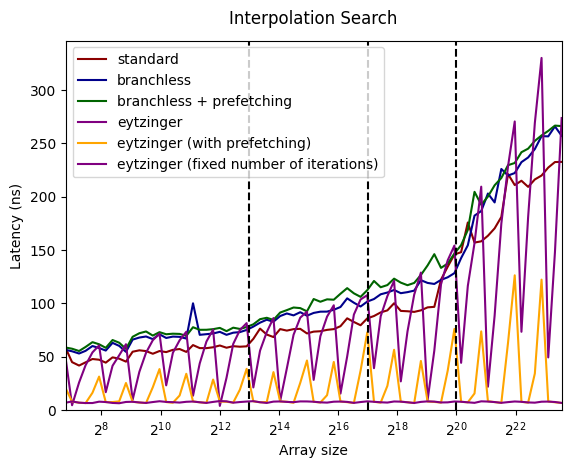

In [113]:
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Interpolation Search', 'Latency (ns)', current[0] + '.svg', 1, legend=True)

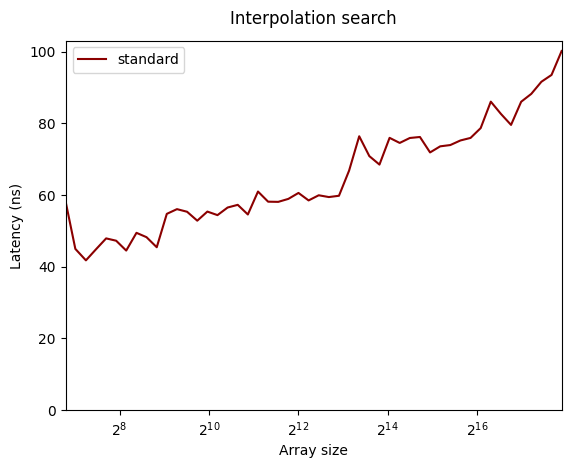

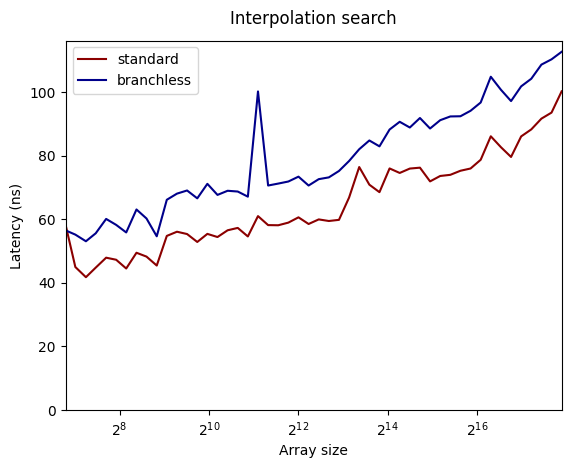

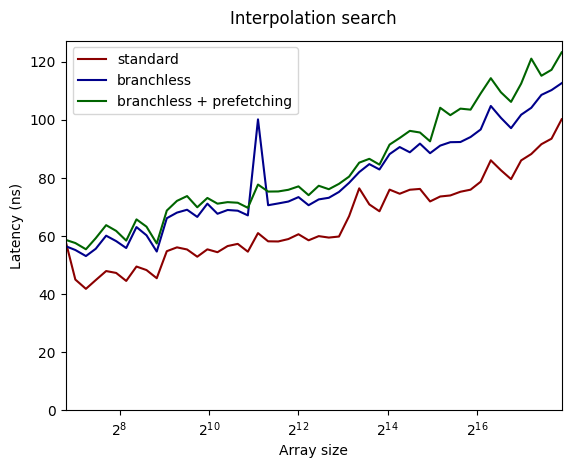

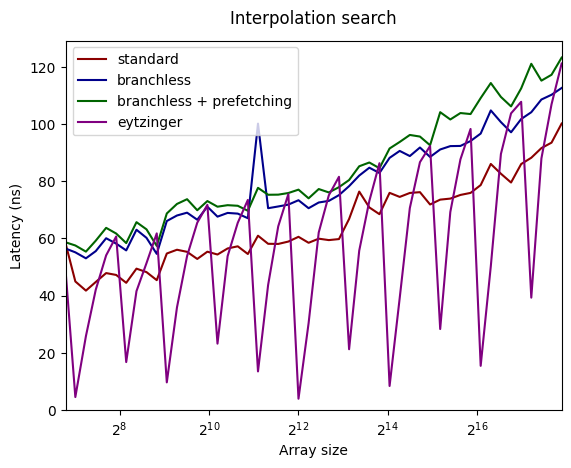

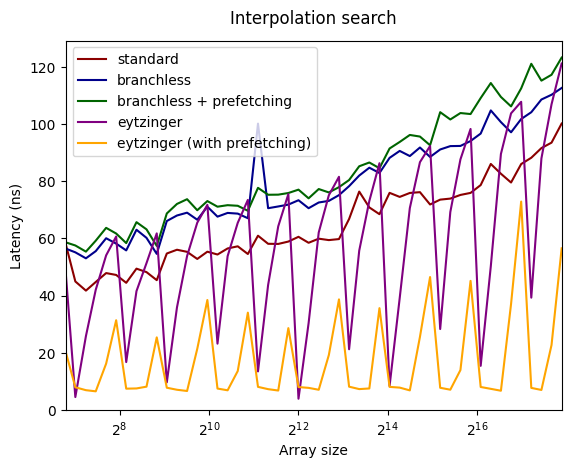

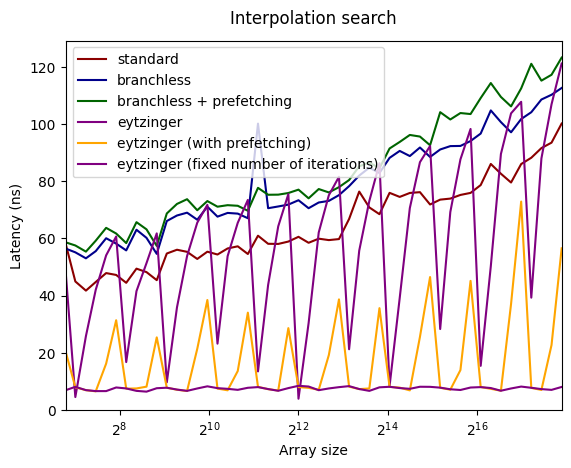

In [114]:
lim = 50
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i +1]:
        plt.plot(ns[:lim], latencies[:lim], color=color, label=name)
    plot('Interpolation search', 'Latency (ns)', 'mini.svg', legend=True)